In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import LogCosh
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sys

In [2]:
# 저장된 모델 불러오기
model_path = "best_model.h5"  # 저장된 모델 경로
model = load_model(model_path)

In [3]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 데이터 로드 및 전처리
datasPath = os.path.join(os.getcwd(), "..", "data_preprocessing", "merged_final_data_168_shifted.csv")
print(f"file path : {datasPath}")
data = pd.read_csv(datasPath, encoding='utf-8')

# Week_Num 속성 제거
data = data.drop(columns=['Week_Num'])

# 입력과 출력 컬럼 정의
X_columns = ['datetime_x', 'datetime_y', 'Article_Num', 'Polution', 'Enviroment_Polution', 'Biodiversity_Loss',
            'Acid_Rain', 'Water_Pollution', 'Climate_Crisis', 'Accelerated_Global_Warming',
            'Ozone_Layer_Depletion', 'Hazardous_Substance_Leakage', 'Carbon_Dioxide',
            'Weekly_News_Count', 'News_Ratio']
y_columns = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 
            'windspeed', 'sealevelpressure', 'moonphase']

# String data인 datetime을 Unix Timestamp로 변환
data['datetime_x'] = pd.to_datetime(data['datetime_x'])  # 날짜를 datetime 객체로 변환
data['datetime_x'] = data['datetime_x'].map(pd.Timestamp.timestamp)  # Unix Timestamp로 변환
data['datetime_y'] = pd.to_datetime(data['datetime_y'])  # 날짜를 datetime 객체로 변환
data['datetime_y'] = data['datetime_y'].map(pd.Timestamp.timestamp)  # Unix Timestamp로 변환

# 데이터 분리
X = data[X_columns]
y = data[y_columns]

# 스케일링
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# 데이터를 학습시켜 MinMaxScaler를 초기화
X = x_scaler.fit_transform(X)  # 전체 데이터를 사용해 fit
y = y_scaler.fit_transform(y)  # 전체 데이터를 사용해 fit

# 데이터를 테스트 데이터로 설정
X_test = X
y_test = y

# 확인 출력
print(f"\n\nX_test:\n{X_test}")


file path : C:\Users\limul\Desktop\College\2_grade\2_semester\computational_statistics\teamProject\2024-2-CSP\AI\made_by_LJW\..\data_preprocessing\merged_final_data_168_shifted.csv


X_test:
[[0.00000000e+00 0.00000000e+00 4.81927711e-02 ... 2.09790210e-02
  0.00000000e+00 1.59602516e-01]
 [7.98722045e-04 7.98722045e-04 3.37349398e-02 ... 6.99300699e-03
  8.94235245e-04 1.13536667e-01]
 [1.59744409e-03 1.59744409e-03 4.09638554e-02 ... 6.99300699e-03
  3.13594826e-03 1.35537781e-01]
 ...
 [9.98402556e-01 9.98402556e-01 9.08433735e-01 ... 4.05594406e-01
  8.46485533e-01 9.21034841e-01]
 [9.99201278e-01 9.99201278e-01 5.95180723e-01 ... 4.12587413e-01
  8.46485533e-01 6.00509473e-01]
 [1.00000000e+00 1.00000000e+00 5.87951807e-01 ... 1.81818182e-01
  8.46485533e-01 5.93112734e-01]]


In [4]:
# 모델 예측
y_pred = model.predict(X_test)

40/40 [==============================] - 0s 553us/step


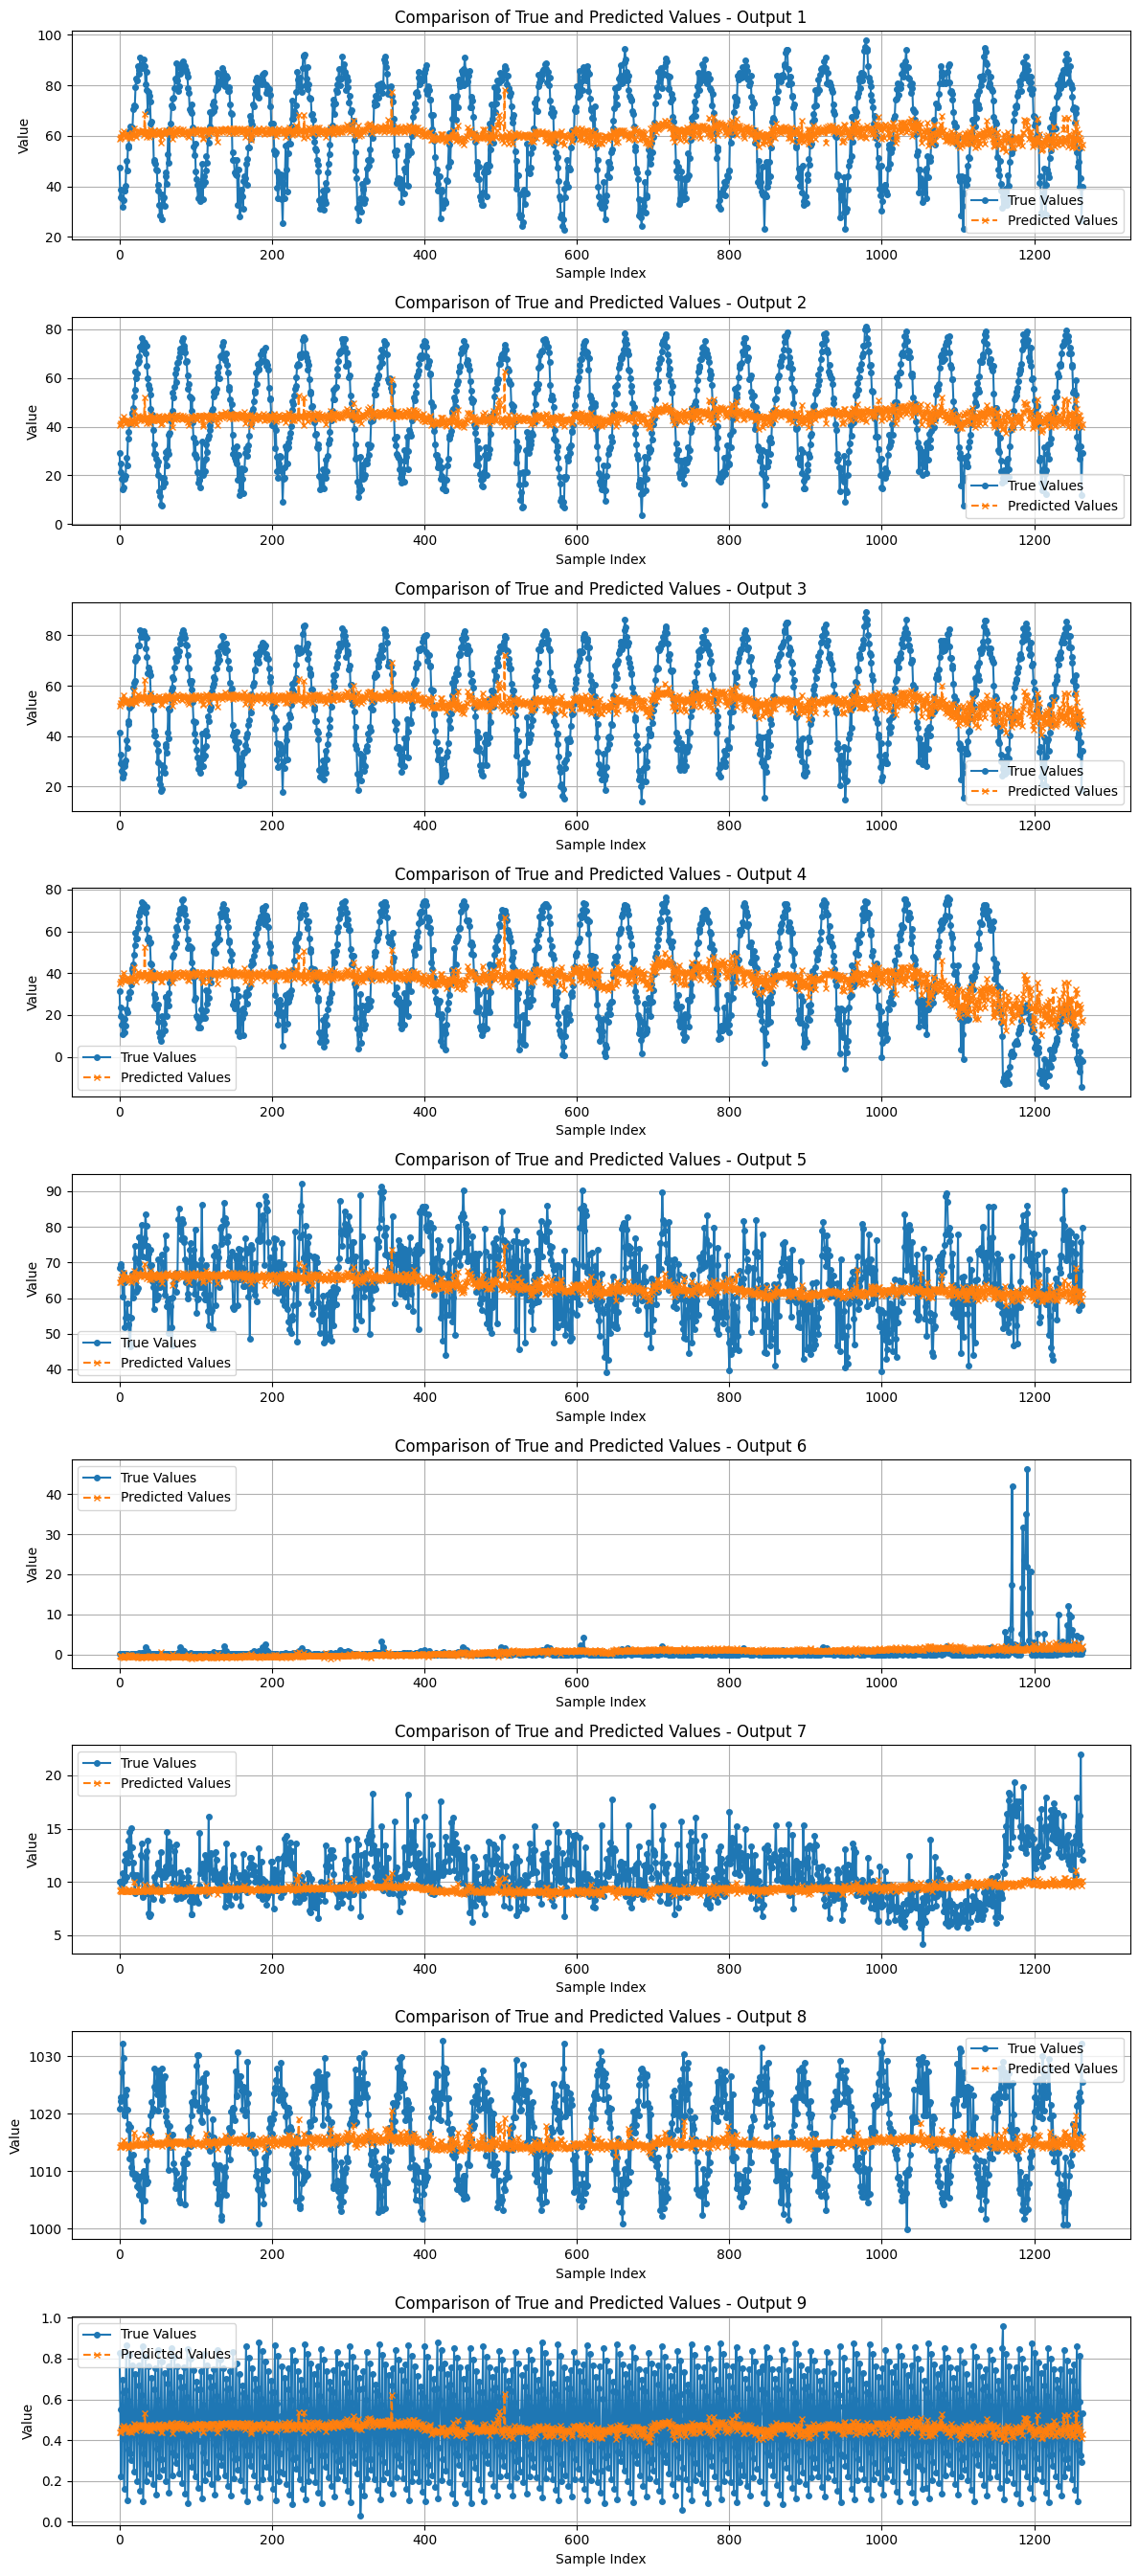

In [5]:
# 스케일링된 데이터를 원래 값으로 복원 (inverse_transform 사용)
y_test_inverse = y_scaler.inverse_transform(y_test)
y_pred_inverse = y_scaler.inverse_transform(y_pred)

# 모든 출력 변수 비교 (그래프 크기 조정)
num_outputs = y_test_inverse.shape[1]  # 출력 변수 수

plt.figure(figsize=(12, num_outputs * 3))  # 출력 변수 수에 따라 그래프 높이 조정
for i in range(num_outputs):
    plt.subplot(num_outputs, 1, i + 1)
    plt.plot(y_test_inverse[:, i], label='True Values', marker='o', linestyle='-', markersize=4)
    plt.plot(y_pred_inverse[:, i], label='Predicted Values', marker='x', linestyle='--', markersize=4)
    plt.title(f'Comparison of True and Predicted Values - Output {i+1}')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()